## Robot@Home 2 - Scenes `v1.3`:PROPERTIES:



`R@H2 notebook series`   

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/70-Scenes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>



### R@H2 functions introduced in this notebook:



-   `rh.get_scenes(id)`
-   `rh.get_scene_labels(id, obj_ext)`
-   `plot_scene(scene_file)`



### Initial requirements



Install Robot@Home2 Toolbox using the Python package manager



In [1]:
!pip install robotathome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 836 kB 7.2 MB/s 
     |████████████████████████████████| 58 kB 2.9 MB/s 


Check that the installation has been successful



In [2]:
import robotathome as rh
print (rh.__version__)

1.0.5


#### Using Google Colab and Google Drive



If you haven't yet mounted R@H2 Dataset public share on your Google Drive click
[this](https://drive.google.com/drive/folders/15fQwm4G3hHQR5vI9q0CVDlwxMwaJheC8?usp=sharing).

In order to access from Google Colab it's mandatory to create a `shorcut`. You
just need to select the shared folder `Shared with me > R@H2-2.0.1`, right click
and select the corresponding menu option `Add Shortcut to Drive`. Now, a new
folder (actually a shortcut) with the same name will appear under `My Drive`.

Next, mount Google Drive in Google Colab. The browser will ask for the
authorization to access the Google Drive account. Sign in to your Google account
and Google Drive will be mounted to `/content/drive`. Note that the R@H2 files are
located in the `/content/drive/MyDrive/R@H2-2.0.1` folder.



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


More info in [this notebook](https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/05-Google-colab-drive.ipynb).



### Importing R@H2



In [4]:
import os
import pandas as pd
from robotathome import RobotAtHome
from robotathome import logger, log, set_log_level
from robotathome import time_win2unixepoch, time_unixepoch2win
from robotathome import plot_scene

In [5]:
log.set_log_level('INFO')  # SUCCESS is the default

level_no, level_name = log.get_current_log_level()
print(f'Current log level name: {level_name}')

Current log level name: INFO


### Instantiating the toolbox



The toolbox is modeled around the RobotAtHome class, so we'll begin instantiating it and
creating a working object.

The RobotAtHome class has some attributes:

-   `rh_path` : string with the full path for robotathome database, usually `rh.db`.
    Its default value is `'.'` (the current directory)
-   `wspc_path` : string with the full path where results or temporary files are
    stored. It's the path to the workspace directory. Its default value also is
    `'.'`.
-   `db_filename` : string with the database filename. Its default value is `'rh.db'`
-   `rgbd_path` : string with the full path to where RGBD images are stored. Its default value is
    `'./files/rgbd'`.
-   `scene_path` : string with the full path to where Scene (3D) images are stored. Its
    default value is `'./files/scene'`.

We assume that we are running this notebook in Google Colab. Therefore our
folder structure is as follows:

    /content/drive
    └─── MyDrive
         ├─── R@H2-2.0.1
         │    └── files
         │        ├── rgbd
         │        └── scene
         └─────── rh.db

Let's instantiate our first, and usually the only one, object:



In [6]:
my_rh_path = '/content/drive/MyDrive/R@H2-2.0.1'
my_rgbd_path = os.path.join(my_rh_path, 'files/rgbd')
my_scene_path = os.path.join(my_rh_path, 'files/scene')
my_wspc_path = '/content'

try: 
      rh = RobotAtHome(my_rh_path, my_rgbd_path, my_scene_path, my_wspc_path)
except:
      logger.error("Something was wrong")

2022-06-05 11:31:44.332 | SUCCESS  | robotathome.core.reader:__open_dataset:85 - Connection is established: rh.db


Now you are ready to dive into the R@H2 database. Following we'll show a set of
functions to extract some of the main reference data.



### Scenes



Scenes contain the 3D coloured point cloud reconstruction for each room. Such
reconstruction was built employing a mapping application which registers the
RGB-D observations employing different ICP-based techniques. The 3D point clouds
are stored as plain text files containing the coordinates and colors of the
points that make up the 3D cloud. These files can be easily visualized with the
built-in function `plot_scene` or a software like [MeshLab](https://www.meshlab.net/).

![img](https://github.com/goyoambrosio/RobotAtHome2/blob/master/notebooks/70-scenes-meshlab.png?raw=true "Anto's livingroom (12-scene.txt) displayed thorugh MeshLab")

As usual, this toolbox provides a function to get scenes



In [7]:
scenes = rh.get_scenes()
logger.info("\nScenes: \n{}", scenes)

2022-06-05 11:31:55.264 | INFO     | __main__:<module>:2 - 
Scenes: 
    id  home_session_id  home_subsession_id  home_id  room_id  \
0    0                0                   0        0        0   
1    1                0                   0        0        1   
2    2                0                   0        0        3   
3    3                0                   0        0        4   
4    4                0                   0        0        5   
..  ..              ...                 ...      ...      ...   
67  67                6                   1        4       36   
68  68                6                   0        4       39   
69  69                6                   1        4       39   
70  70                6                   0        4       40   
71  71                6                   1        4       40   

                                           scene_file  
0   /content/drive/MyDrive/R@H2-2.0.1/files/scene/...  
1   /content/drive/MyDrive/R@H2-2.0.1/

After some notebooks we have enough skills to advance with an example of multi
column filtering



In [8]:
# Let's suppose we want to get the scene file of the kitchen of the home
# session alma-s1

# Get the ids from their names
hs_id = rh.name2id('anto-s1','hs')
r_id = rh.name2id('anto_livingroom1','r')

# Let's query the scene dataframe with the ids
scene =  scenes.query(f'home_session_id=={hs_id} & room_id=={r_id}')
# Extract the value of the scene_file field
scene_file = scene.scene_file.values[0]
logger.info(f'\nScene file: \n{scene_file}')

2022-06-05 11:32:03.037 | INFO     | __main__:<module>:12 - 
Scene file: 
/content/drive/MyDrive/R@H2-2.0.1/files/scene/session_2/anto/livingroom1/subsession_1/12_scene.txt


It's time to 3D plot the scene.



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

We need to load the scene. (*Running next cell in Google Colab will take a while.
Be patient !*)



In [10]:
point_cloud = np.loadtxt(scene_file, skiprows=6)

Now, we are ready to plot the scene



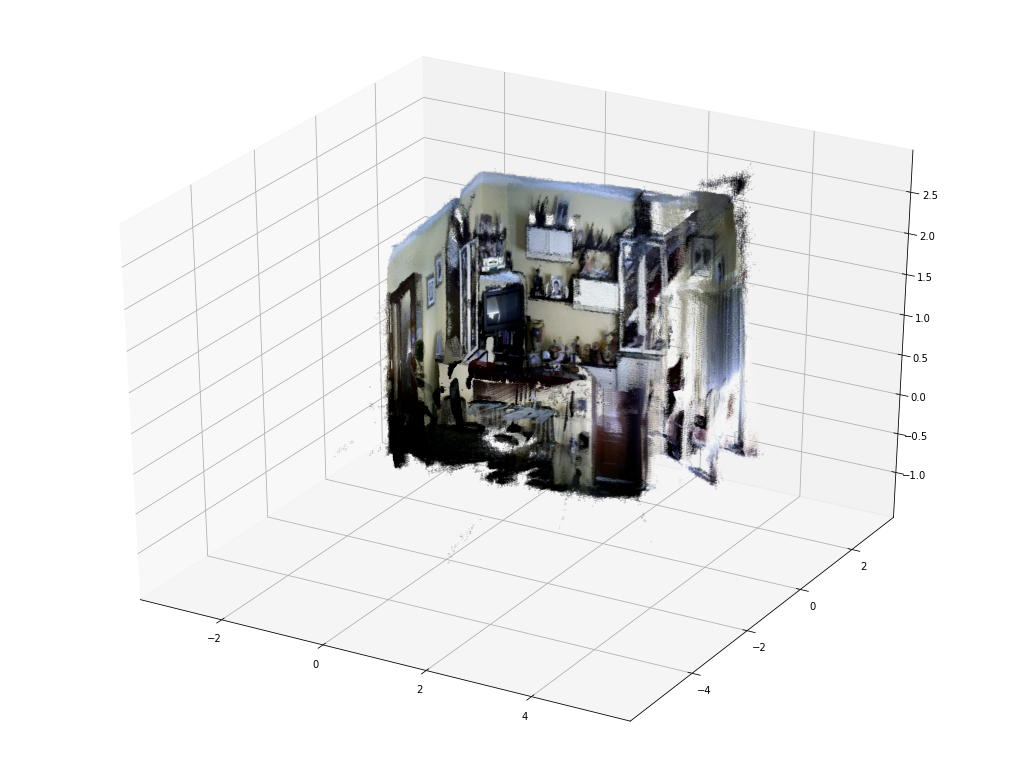

In [11]:
xyz = point_cloud[:,:3]
rgb = point_cloud[:,3:]
plt.figure(figsize = (18, 14))
ax = plt.axes(projection='3d')
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = rgb, s=0.01)
plt.show()

### Labeled 3D point maps



Each reconstructed room, i.e. scene has been labeled setting bounding boxes to
the objects appearing in the point cloud reconstruction and including annotations
with the ground truth information about their category, e.g. counter, book,
couch, shelf, as well as an object id to identify the particular instance, i.e.
counter-1, book-3, etc.

To get the labels for a scene use the following function



In [12]:
# let's extract the labels for any scene, for example the scene with id = 0
id = scene['id'].values[0]
scene_labels = rh.get_scene_labels(id)
logger.info(f'\nScene labels: {scene_labels.info()}')

2022-06-05 11:35:16.661 | INFO     | __main__:<module>:4 - 
Scene labels: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             85 non-null     int64  
 1   local_id       85 non-null     int64  
 2   scene_id       85 non-null     int64  
 3   object_id      85 non-null     int64  
 4   object_name    85 non-null     object 
 5   bb_pose_x      85 non-null     float64
 6   bb_pose_y      85 non-null     float64
 7   bb_pose_z      85 non-null     float64
 8   bb_pose_yaw    85 non-null     float64
 9   bb_pose_pitch  85 non-null     float64
 10  bb_pose_roll   85 non-null     float64
 11  bb_corner1_x   85 non-null     float64
 12  bb_corner1_y   85 non-null     float64
 13  bb_corner1_z   85 non-null     float64
 14  bb_corner2_x   85 non-null     float64
 15  bb_corner2_y   85 non-null     float64
 16  bb_corner2_z   85 non-null     float64
dtypes: float64(12), int64(4), object(1)
memory usage: 11.4+ 

As you can see, for each label there is data about its pose and 3D coordinates.



In [13]:
logger.info(f'\nThere are {len(scene_labels)} object labels in the scene {id}\n')
# Let's examine the first bounding box
local_id = 0
logger.info('\nData about the label {}', scene_labels.query('local_id==0').loc[0,:])

2022-06-05 11:35:21.791 | INFO     | __main__:<module>:1 - 
There are 85 object labels in the scene 12

2022-06-05 11:35:21.799 | INFO     | __main__:<module>:4 - 
Data about the label id                     386
local_id                 0
scene_id                12
object_id              369
object_name      cushion_0
bb_pose_x          1.45029
bb_pose_y        -0.618376
bb_pose_z         0.537995
bb_pose_yaw        0.21677
bb_pose_pitch    -0.187421
bb_pose_roll     -0.407209
bb_corner1_x       1.27315
bb_corner1_y      -0.92887
bb_corner1_z      0.444868
bb_corner2_x       1.65392
bb_corner2_y      -0.34463
bb_corner2_z      0.536396
Name: 0, dtype: object


Each box delimits an object for which the dataset has additional information
about its features. If you consider this information of interest you can obtain
it by accessing the extended set of labels. Please, note that this extended set
is experimental: object info has been obtained from 2D observations and the
bounding box set has slightly more records (#2446) than the objects one (#2125).



In [14]:
# let's extract the labels for any scene, for example the scene with id = 0
id = scene['id'].values[0]
scene_labels = rh.get_scene_labels(id, True)
logger.info(f'\nScene labels: {scene_labels.info()}')

2022-06-05 11:35:27.985 | INFO     | __main__:<module>:4 - 
Scene labels: None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      85 non-null     int64  
 1   local_id                85 non-null     int64  
 2   scene_id                85 non-null     int64  
 3   object_id               85 non-null     int64  
 4   object_name             85 non-null     object 
 5   object_type_id          85 non-null     int64  
 6   bb_pose_x               85 non-null     float64
 7   bb_pose_y               85 non-null     float64
 8   bb_pose_z               85 non-null     float64
 9   bb_pose_yaw             85 non-null     float64
 10  bb_pose_pitch           85 non-null     float64
 11  bb_pose_roll            85 non-null     float64
 12  bb_corner1_x            85 non-null     float64
 13  bb_corner1_y            85 non-null     float64
 14  bb_corner1_z            85 non-null     floa

Continuing the example



In [15]:
logger.info(f'\nThere are {len(scene_labels)} object labels in the scene {id}\n')
# Let's examine again the first bounding box
logger.info('\nData about the label \n{}', scene_labels.query('local_id==0').loc[0,:])

2022-06-05 11:35:32.889 | INFO     | __main__:<module>:1 - 
There are 85 object labels in the scene 12

2022-06-05 11:35:32.901 | INFO     | __main__:<module>:3 - 
Data about the label 
id                              386
local_id                          0
scene_id                         12
object_id                       369
object_name               cushion_0
object_type_id                   19
bb_pose_x                   1.45029
bb_pose_y                 -0.618376
bb_pose_z                  0.537995
bb_pose_yaw                 0.21677
bb_pose_pitch             -0.187421
bb_pose_roll              -0.407209
bb_corner1_x                1.27315
bb_corner1_y               -0.92887
bb_corner1_z               0.444868
bb_corner2_x                1.65392
bb_corner2_y               -0.34463
bb_corner2_z               0.536396
planarity                  0.371469
scatter                    0.579293
linearity                  0.183205
min_height                  0.33062
max_height            

<a href="https://colab.research.google.com/github/goyoambrosio/RobotAtHome2/blob/master/notebooks/70-Scenes.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

